In [1]:
import warnings
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_openml,load_iris,fetch_california_housing
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import (
RepeatedStratifiedKFold, 
cross_val_score, 
train_test_split, 
GridSearchCV,
cross_val_predict, 
learning_curve, 
validation_curve)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error,zero_one_loss, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from os.path import join as pjoin
#sharper plots
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from PIL import Image
import random
warnings.filterwarnings("ignore")
from shutil import copyfile
from sklearn.svm import SVC
import openpyxl

In [2]:
#data_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
test_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
train_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_train.csv"
real_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\unreal.xlsx"
df_real = pd.read_excel(real_path)
df_test = pd.read_csv(test_path)
df_train = pd.read_csv(train_path)

df_test.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df_train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df_real.rename(columns={'No': 'index'}, inplace=True)

df_test


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0,2012.833,3.4,NaN,NaN,24.95744,121.53711
1,1,2013.083,34.8,405.21340,1.0,24.97349,121.53372
2,2,2013.500,4.1,2147.37600,3.0,24.96299,121.51284
3,3,2012.917,18.9,1009.23500,0.0,24.96357,121.54951
4,4,2013.417,3.9,2147.37600,3.0,24.96299,121.51284
...,...,...,...,...,...,...,...
78,78,2013.167,21.3,537.79710,4.0,24.97425,121.53814
79,79,2012.917,9.9,279.17260,NaN,24.97528,121.54541
80,80,2013.417,10.5,279.17260,7.0,24.97528,121.54541
81,81,2013.250,17.8,NaN,3.0,24.96731,121.51486


In [3]:
df_train

,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,2013.083,34.0,157.6052,7.0,24.96628,121.54196,39.1
1,1,2013.500,13.3,561.9845,5.0,24.98746,121.54391,54.8
2,2,2012.917,13.7,1236.5640,1.0,24.97694,121.55391,30.6
3,3,2013.500,8.5,104.8101,5.0,24.96674,121.54067,55.5
4,4,2013.500,13.2,1164.8380,NaN,24.99156,121.53406,34.3
...,...,...,...,...,...,...,...,...
326,326,2013.417,38.5,216.8329,7.0,24.98086,121.54162,41.0
327,327,2013.417,9.7,421.4790,5.0,24.98246,121.54477,49.3
328,328,2012.750,0.0,208.3905,6.0,24.95618,121.53844,44.0
329,329,2013.167,16.2,2288.0110,3.0,24.95885,121.51359,24.4


In [4]:
df_real

,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


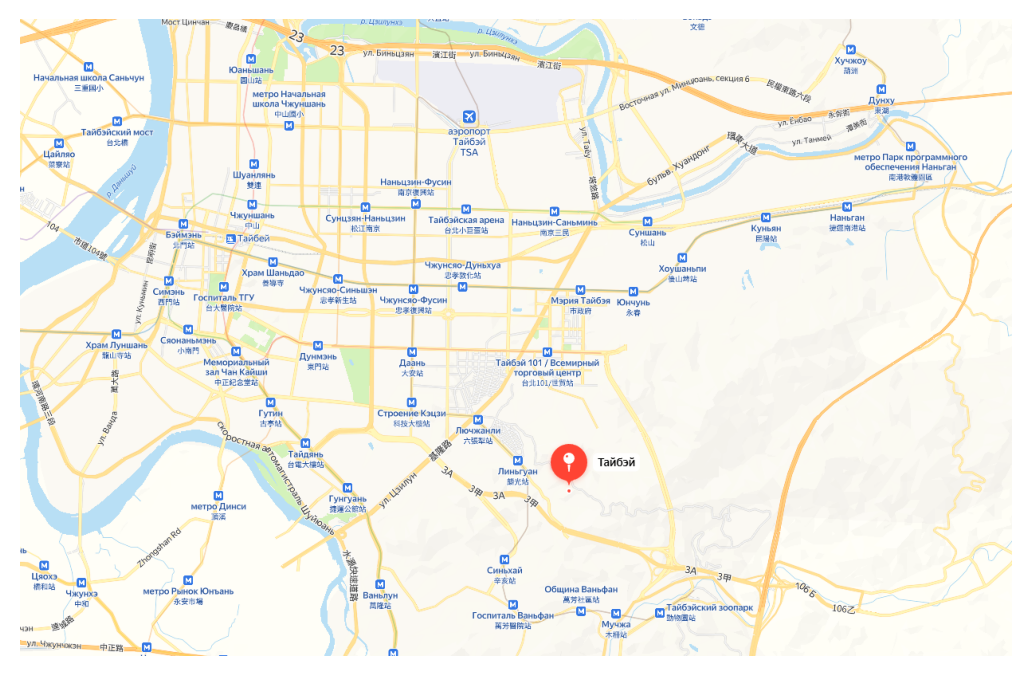

In [5]:
image_path = 'C:\\Users\\Acer\\Documents\\Lightshot\\Screenshot_89.png'
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

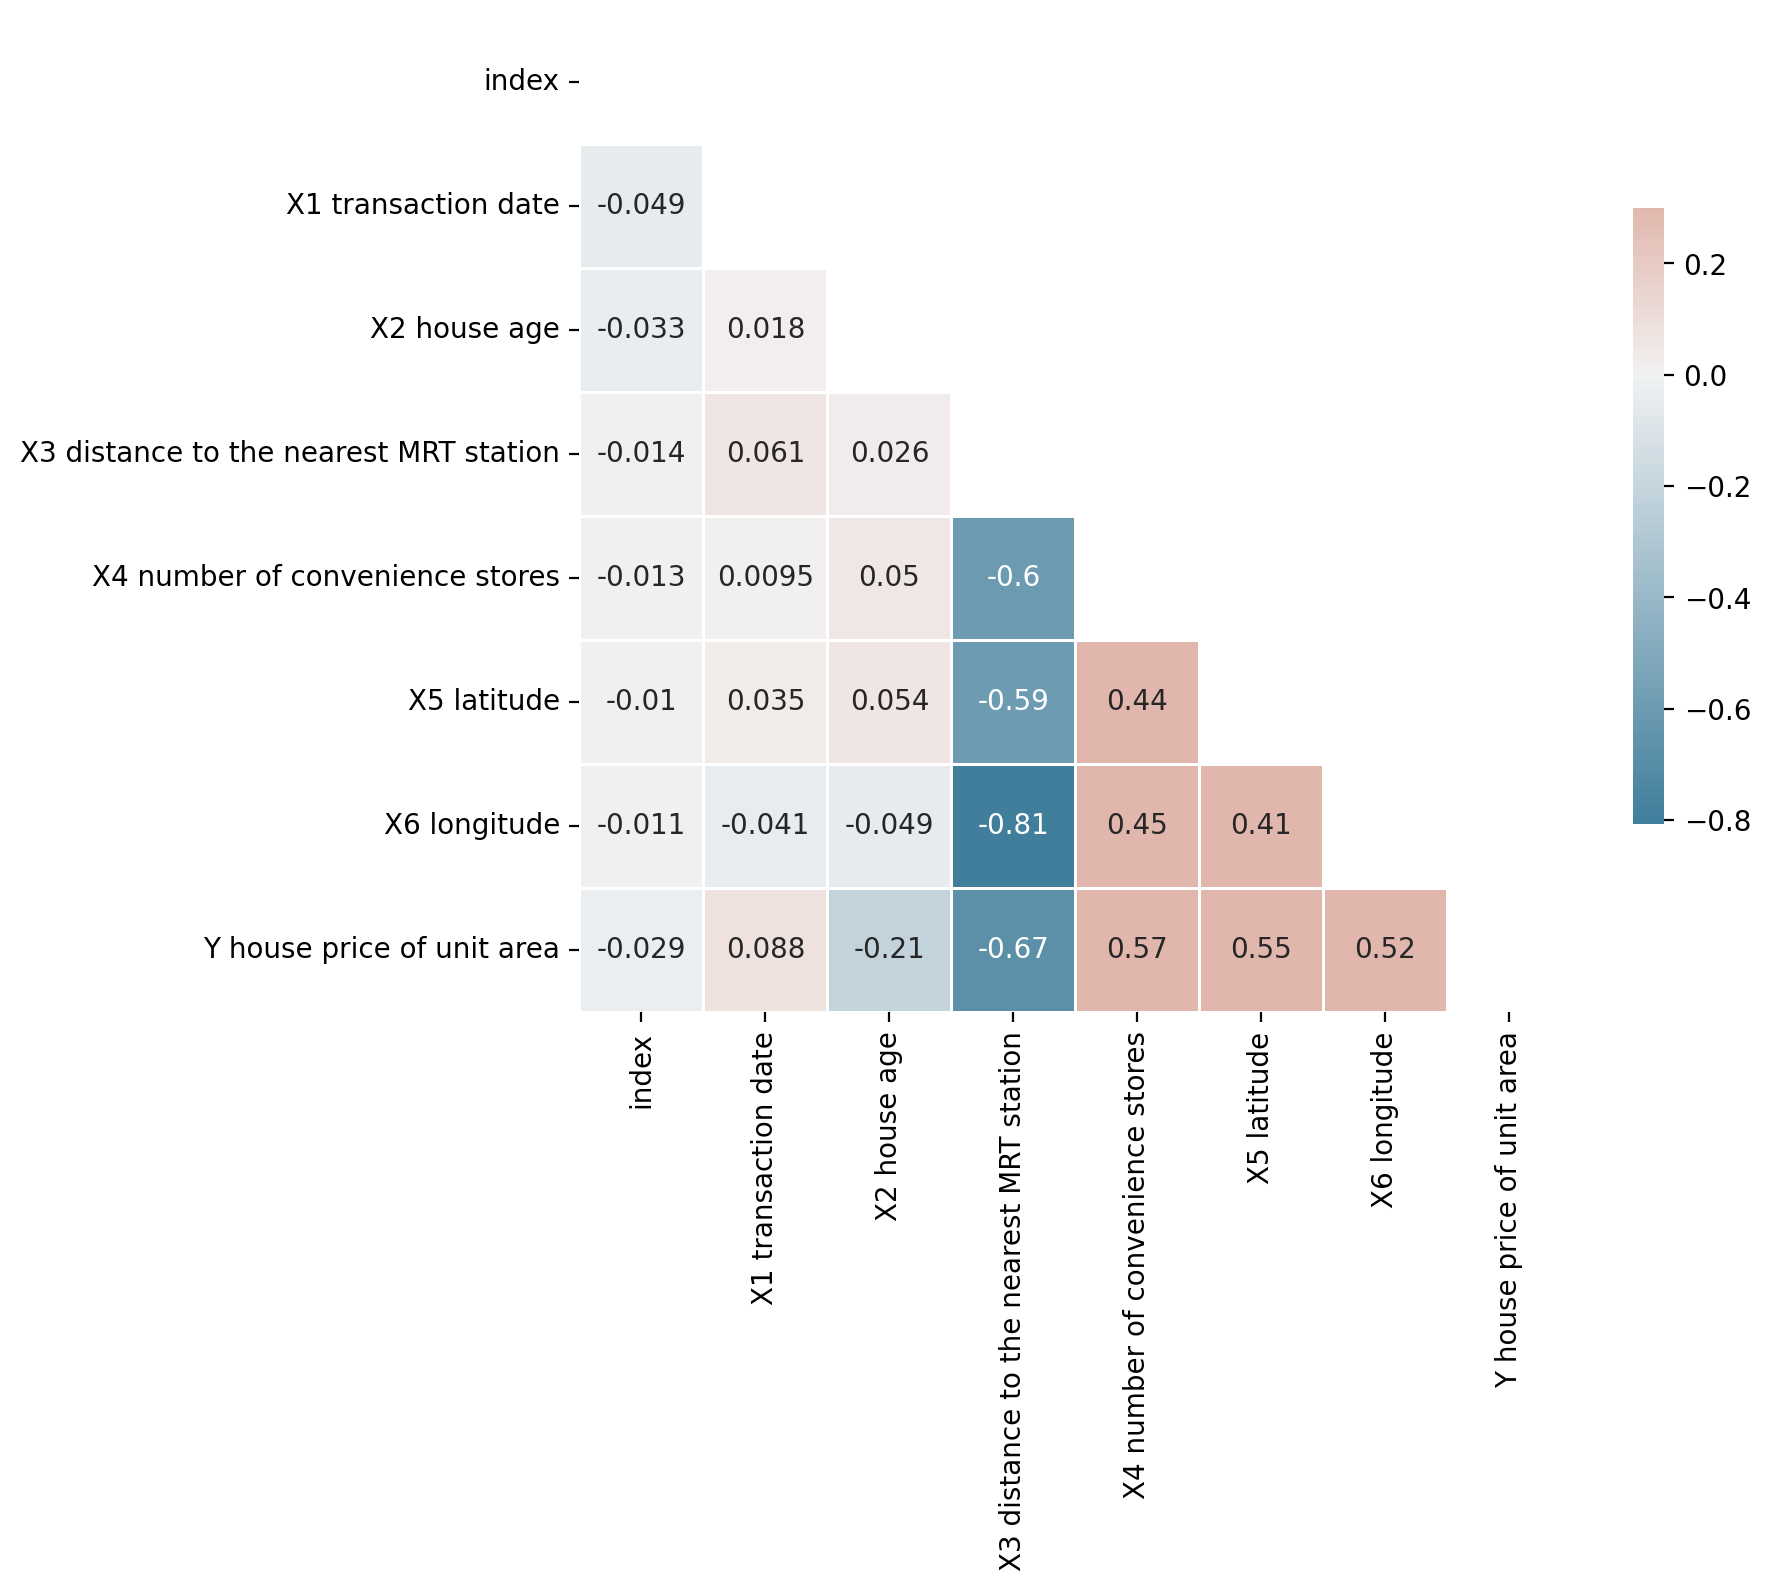

In [6]:
def corrplot(d: pd.DataFrame) -> None:
  corr = d.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  figsize = (min(d.shape[1], 11), min(d.shape[1], 9))
  f, ax = plt.subplots(figsize=figsize)
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
  
corrplot(df_real)

In [7]:
import pandas as pd

def FutureEngeneeringGeneration(df_gen, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude):
    df_gen = df_gen.copy()

    df_gen['X1 transaction date'] = df_gen['X1 transaction date'] - start_date
    df_gen['X5 latitude'] = df_gen['X5 latitude'] - start_latitude
    df_gen['X6 longitude'] = df_gen['X6 longitude'] - start_longitude

    df_gen['Month'] = df_gen['X1 transaction date'].apply(lambda x: ((int((x - int(x)) * 12) + 1))) # Extract month (1 to 12)
    # Add a 'Season' column based on the month
    def get_season(month):
        if month in [12, 1, 2]:
            return 1
        elif month in [3, 4, 5]:
            return 2
        elif month in [6, 7, 8]:
            return 3
        elif month in [9, 10, 11]:
            return 4

    df_gen['Season'] = df_gen['Month'].apply(get_season)

    return df_gen

start_latitude = 24.93207
start_longitude = 121.47353
start_date = 2012.585

end_latitude = 25.01459
end_longitude = 121.56627
end_date = 2013.584

df_real_1 = FutureEngeneeringGeneration(df_real, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)

df_real_1.sample(20)


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Month,Season
84,85,0.498333,15.1,383.28050,7,0.03528,0.07111,43.7,6,3
345,346,0.081667,0.0,185.42960,0,0.03903,0.05817,37.9,1,1
373,374,0.498333,0.0,274.01440,1,0.04273,0.05706,52.2,6,3
258,259,0.831667,0.0,292.99780,6,0.04537,0.07105,63.3,10,4
111,112,0.998333,33.3,196.61720,7,0.04494,0.06871,39.4,12,1
391,392,0.998333,6.2,1939.74900,1,0.01948,0.08034,31.3,12,1
307,308,0.248333,10.3,3079.89000,0,0.02253,0.09274,24.7,3,2
252,253,0.248333,5.9,90.45606,9,0.04226,0.06957,52.7,3,2
127,128,0.665000,3.8,383.86240,5,0.04878,0.07038,55.0,8,3
371,372,0.915000,4.1,312.89630,5,0.02384,0.06603,51.7,11,4


In [8]:
# Check again
print(df_real_1.isnull().sum())
print(np.isinf(df_real_1).sum())

index                                     0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
Month                                     0
Season                                    0
dtype: int64
index                                     0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
Month                                     0
Season                                    0
dtype: int64


In [9]:
# Define features (X) and target (y)
X = df_real_1.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_real_1['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (331, 9)
Test set size: (83, 9)
Model score is: 0.6837167175880128
Mean Squared Error (MSE) is: 53.05960265346097


In [10]:
import statsmodels.api as sm

# Add a constant (intercept) for statsmodels
X_train_sm = sm.add_constant(x_train)  

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the summary, which includes t-tests, p-values, R², and more
print(model_sm.summary())


                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.565
Model:                                    OLS   Adj. R-squared:                  0.552
Method:                         Least Squares   F-statistic:                     46.24
Date:                        Fri, 04 Apr 2025   Prob (F-statistic):           7.34e-53
Time:                                23:41:08   Log-Likelihood:                -1198.8
No. Observations:                         331   AIC:                             2418.
Df Residuals:                             321   BIC:                             2456.
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [11]:
df_real_2 = df_real_1.drop(columns=['index', 'X6 longitude', 'Season'])
# Define features (X) and target (y)
X = df_real_2.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_real_2['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (331, 6)
Test set size: (83, 6)
Model score is: 0.6932546219545737
Mean Squared Error (MSE) is: 51.459526253668145


In [13]:
df_real_3 = df_real_2.copy()
df_real_3['X3 distance to the nearest MRT station'] = np.log(df_real_3['X3 distance to the nearest MRT station'])

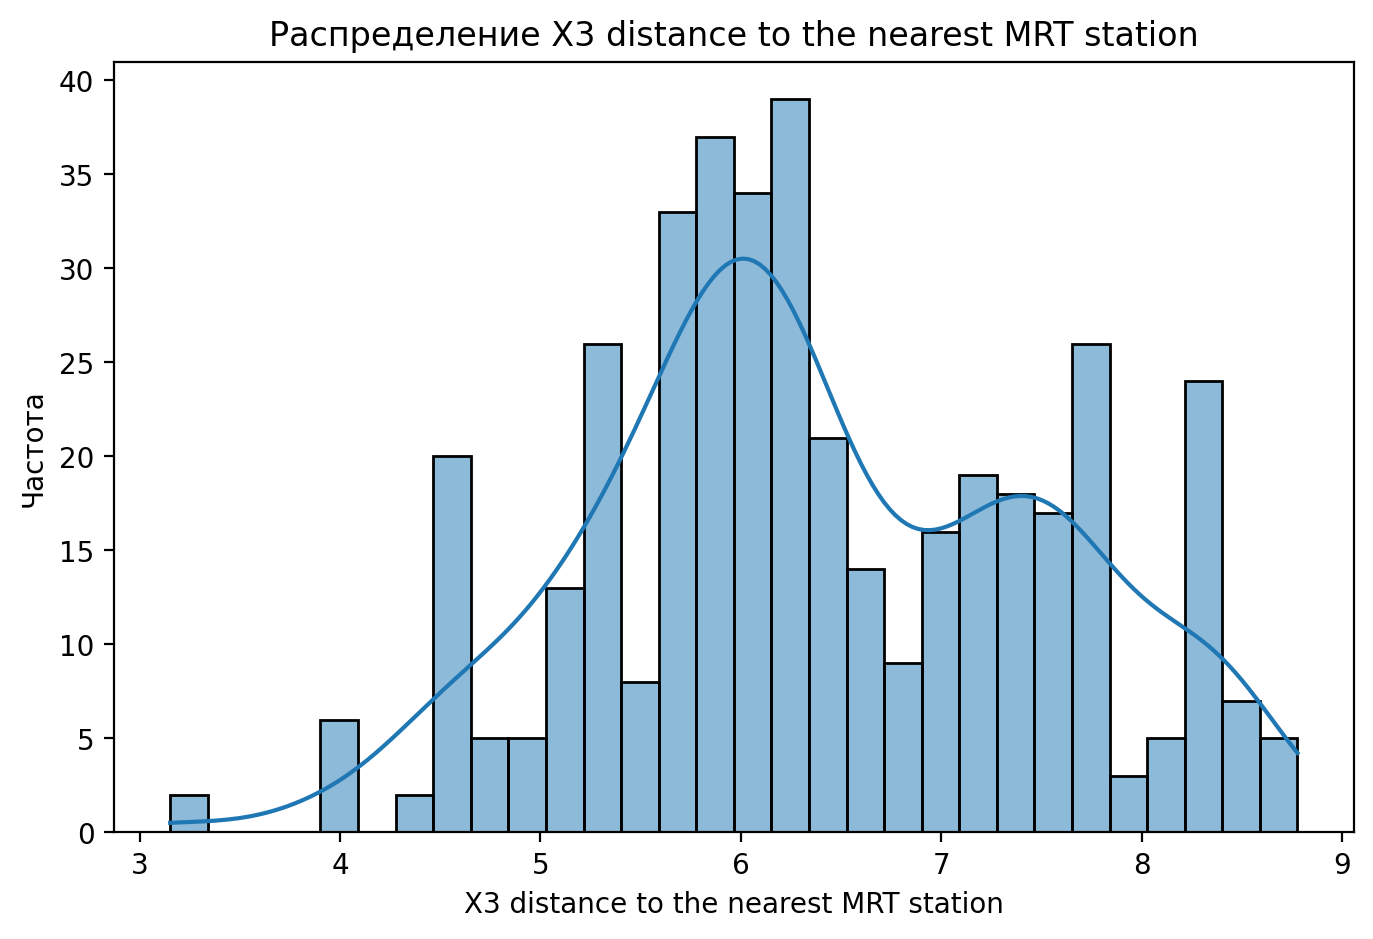

In [14]:
# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(df_real_3, x='X3 distance to the nearest MRT station', kde=True, bins=30)
plt.title('Распределение X3 distance to the nearest MRT station')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel("Частота")
plt.show()

In [15]:

X = df_real_3.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_real_3['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (331, 6)
Test set size: (83, 6)
Model score is: 0.7352397268510501
Mean Squared Error (MSE) is: 44.41611578257936
